### Question 2: Ridge Regression and LASSO
+ Generate dataset using `numpy`
+ Use `scipy.optimize.minimize` to solve the problem of optimization.

In [1]:
import numpy as np
import RidgeRegression as RR
from matplotlib import pyplot as plt
from sklearn.linear_model import Lasso

In [2]:
m = 150
d = 75
X = np.random.rand(m, d)
theta = np.zeros(d)
indices_neg, indices_pos = np.split(np.random.choice(10, 10, replace=False), 2)
theta[indices_neg] = -10
theta[indices_pos] = 10

noise = np.random.normal(loc=0, scale=0.1, size=(m,))
y = np.dot(X, theta) + noise

print(theta.shape)
print(X.shape)
print(noise.shape)
print(y.shape)

(75,)
(150, 75)
(150,)
(150,)


In [3]:
train_X, valid_X, test_X = X[:80], X[80:100], X[100:]
train_y, valid_y, test_y = y[:80], y[80:100], y[100:]
print(train_X.shape)
print(valid_X.shape)
print(test_X.shape)

(80, 75)
(20, 75)
(50, 75)


RidgeRegress object: reg_param: 1e-06
RidgeRegress object: reg_param: 1.1233240329780266e-06
RidgeRegress object: reg_param: 1.261856883066021e-06
RidgeRegress object: reg_param: 1.4174741629268049e-06
RidgeRegress object: reg_param: 1.592282793341094e-06
RidgeRegress object: reg_param: 1.788649529057435e-06
RidgeRegress object: reg_param: 2.0092330025650458e-06
RidgeRegress object: reg_param: 2.2570197196339214e-06
RidgeRegress object: reg_param: 2.5353644939701112e-06
RidgeRegress object: reg_param: 2.848035868435799e-06
RidgeRegress object: reg_param: 3.1992671377973847e-06
RidgeRegress object: reg_param: 3.5938136638046257e-06
RidgeRegress object: reg_param: 4.037017258596558e-06
RidgeRegress object: reg_param: 4.534878508128582e-06
RidgeRegress object: reg_param: 5.0941380148163755e-06
RidgeRegress object: reg_param: 5.72236765935022e-06
RidgeRegress object: reg_param: 6.4280731172843194e-06
RidgeRegress object: reg_param: 7.220809018385457e-06
RidgeRegress object: reg_param: 8.11

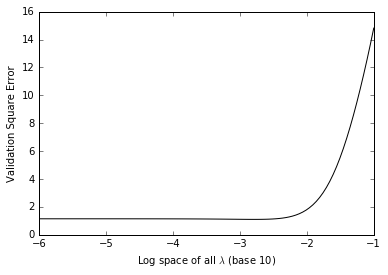

Lowest Validation error providing $\lambda$ = 0.0017073526474706904
RidgeRegress object: reg_param: 0.0017073526474706904
Distance between two solutions: 8.705695898348847e-07


In [4]:
lambda_params = np.logspace(start=-6, stop=-1, num=100)
valid_set_results = np.zeros(lambda_params.shape[0])
for l in range(0, lambda_params.shape[0]):
    rr = RR.RidgeRegress(reg_param=lambda_params[l])
    rr.fit(X=train_X, y=train_y)
    pred_valid_y = rr.predict(X=valid_X)
    valid_set_results[l] = np.power(pred_valid_y - valid_y, 2).sum()

plt.plot(np.log10(lambda_params), valid_set_results, 'k-')
plt.xlabel('Log space of all $\\lambda$ (base 10)')
plt.ylabel('Validation Square Error')
plt.show()

best_lambda = lambda_params[np.argmin(valid_set_results)]
print("Lowest Validation error providing $\\lambda$ = {0}".format(best_lambda))
rr = RR.RidgeRegress(reg_param=best_lambda)
rr.fit(X=train_X, y=train_y, check_solution=True)

#### Observations
+ Note the variation in the validation loss with the logspace of $\lambda$. The lowest point is reported.
+ The method coded is very similar to the answer obtained using `sklearn.linear_model.Ridge`.

In [5]:
# Take the first 10 values in the theta learned and compare with the first 10 in the actual theta
print(np.around(rr.theta[:10], decimals=6).tolist())
print(np.around(theta[:10], decimals=6).tolist())
print("Mean Absolute Error in the first 10 values in actual $\\theta$ and learned $\\theta$: {0}".format(
    np.around(np.mean(np.abs(rr.theta[:10] - theta[:10])), decimals=6)))

[10.22086, -9.960855, 9.943262, -10.116063, -9.909732, 10.070817, -10.031415, -9.886881, 10.047881, 10.013133]
[10.0, -10.0, 10.0, -10.0, -10.0, 10.0, -10.0, -10.0, 10.0, 10.0]
Mean Absolute Error in the first 10 values in actual $\theta$ and learned $\theta$: 0.079944


#### Observations
+ Note the preservation of signs in the learned $\theta$ and actual $\theta$
+ The mean absolute errors in the first 10 values is extremely low per $\theta$.

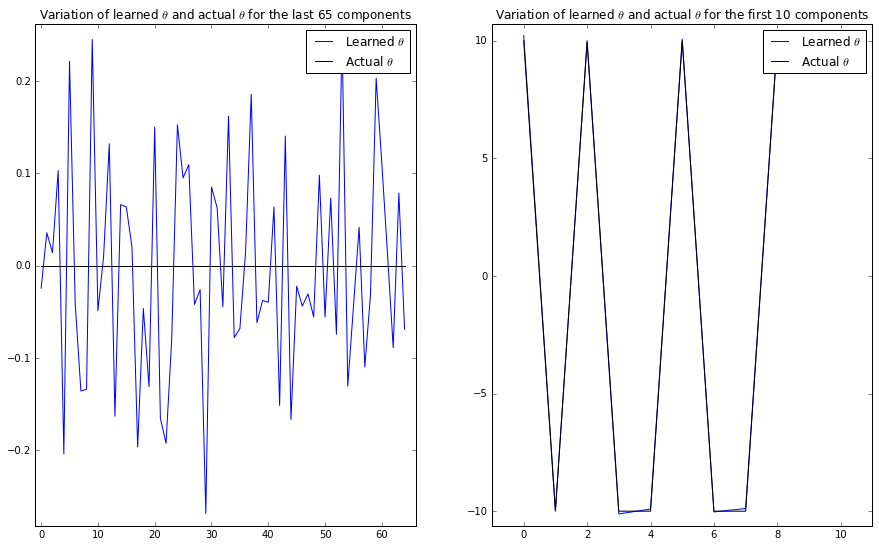

In [6]:
plt.figure(figsize=(15, 9))
plt.subplot(121)
plt.plot(np.arange(0, 65), rr.theta[10:], 'b-', label='Learned $\\theta$')
plt.plot(np.arange(0, 65), theta[10:], 'k-', label='Actual $\\theta$')
plt.ylim((1.05*np.amin(rr.theta[10:]), 1.05*np.amax(rr.theta[10:])))
plt.xlim((-1, 66))
plt.title('Variation of learned $\\theta$ and actual $\\theta$ for the last 65 components')
plt.legend(loc='upper right')

plt.subplot(122)
plt.plot(np.arange(0, 10), rr.theta[:10], 'b-', label='Learned $\\theta$')
plt.plot(np.arange(0, 10), theta[:10], 'k-', label='Actual $\\theta$')
plt.ylim((1.05*np.amin(rr.theta[:10]), 1.05*np.amax(rr.theta[:10])))
plt.xlim((-1, 11))
plt.title('Variation of learned $\\theta$ and actual $\\theta$ for the first 10 components')
plt.legend(loc='upper right')
plt.show()

#### Observations
+ Note the variation of learned weights when the actual weights are 0 (plot 1)
+ Note the how the non-zero weights learned in the first 10 components are similar (plot 2)

In [7]:
def clamper(vector, clamp_val):
    dup_vector = np.zeros(vector.shape[0])
    for i in range(0, vector.shape[0]):
        if abs(vector[i]) < clamp_val:
            dup_vector[i] = 0
        else:
            dup_vector[i] = vector[i]
    return dup_vector
    
clamp_2e_01 = clamper(rr.theta, 0.2)
clamp_1e_01 = clamper(rr.theta, 0.1)
clamp_1e_02 = clamper(rr.theta, 0.01)
clamp_1e_03 = clamper(rr.theta, 0.001)
clamp_1e_04 = clamper(rr.theta, 0.0001)

print("Mean Absolute Error in the last 65 values in actual $\\theta$ and learned $\\theta$: {0}".format(
    np.around(np.mean(np.abs(rr.theta[10:] - theta[10:])), decimals=6)))
print("Mean Absolute Error in the last 65 values in actual $\\theta$ and learned $\\theta$ with clamp = 2e-01: {0}".format(
    np.around(np.mean(np.abs(clamp_2e_01[10:] - theta[10:])), decimals=6)))
print("Mean Absolute Error in the last 65 values in actual $\\theta$ and learned $\\theta$ with clamp = 1e-01: {0}".format(
    np.around(np.mean(np.abs(clamp_1e_01[10:] - theta[10:])), decimals=6)))
print("Mean Absolute Error in the last 65 values in actual $\\theta$ and learned $\\theta$ with clamp = 1e-02: {0}".format(
    np.around(np.mean(np.abs(clamp_1e_02[10:] - theta[10:])), decimals=6)))
print("Mean Absolute Error in the last 65 values in actual $\\theta$ and learned $\\theta$ with clamp = 1e-03: {0}".format(
    np.around(np.mean(np.abs(clamp_1e_03[10:] - theta[10:])), decimals=6)))
print("Mean Absolute Error in the last 65 values in actual $\\theta$ and learned $\\theta$ with clamp = 1e-04: {0}".format(
    np.around(np.mean(np.abs(clamp_1e_04[10:] - theta[10:])), decimals=6)))

Mean Absolute Error in the last 65 values in actual $\theta$ and learned $\theta$: 0.096874
Mean Absolute Error in the last 65 values in actual $\theta$ and learned $\theta$ with clamp = 2e-01: 0.021393
Mean Absolute Error in the last 65 values in actual $\theta$ and learned $\theta$ with clamp = 1e-01: 0.06632
Mean Absolute Error in the last 65 values in actual $\theta$ and learned $\theta$ with clamp = 1e-02: 0.096725
Mean Absolute Error in the last 65 values in actual $\theta$ and learned $\theta$ with clamp = 1e-03: 0.096874
Mean Absolute Error in the last 65 values in actual $\theta$ and learned $\theta$ with clamp = 1e-04: 0.096874


#### Observations
+ Note that the values learned in place of zeros in the actual $\theta$ are generally higher than 0.1. This is inferred from the change in mean absolute error for different clamp values.
+ A higher clamp ensures closeness to the 0 weights for the entire $\theta$.

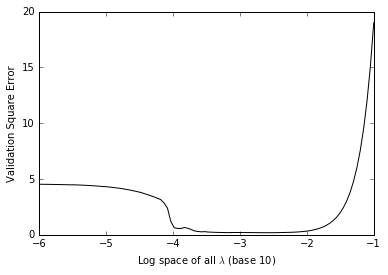

Lowest Validation error providing $\lambda$ = 0.002420128264794381


Lasso(alpha=0.002420128264794381, copy_X=True, fit_intercept=False,
   max_iter=1000000.0, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [8]:
lasso_valid_set_results = np.zeros(lambda_params.shape[0])
for l in range(0, lambda_params.shape[0]):
    lasso_solver = Lasso(alpha=lambda_params[l], fit_intercept=False, max_iter=1e06)
    lasso_solver.fit(X=train_X, y=train_y)
    pred_valid_y = lasso_solver.predict(X=valid_X)
    lasso_valid_set_results[l] = np.power(pred_valid_y - valid_y, 2).sum()

plt.plot(np.log10(lambda_params), lasso_valid_set_results, 'k-')
plt.xlabel('Log space of all $\\lambda$ (base 10)')
plt.ylabel('Validation Square Error')
plt.show()

best_lambda = lambda_params[np.argmin(lasso_valid_set_results)]
print("Lowest Validation error providing $\\lambda$ = {0}".format(best_lambda))
lasso_solver = Lasso(alpha=best_lambda, fit_intercept=False, max_iter=1e06)
lasso_solver.fit(X=train_X, y=train_y)

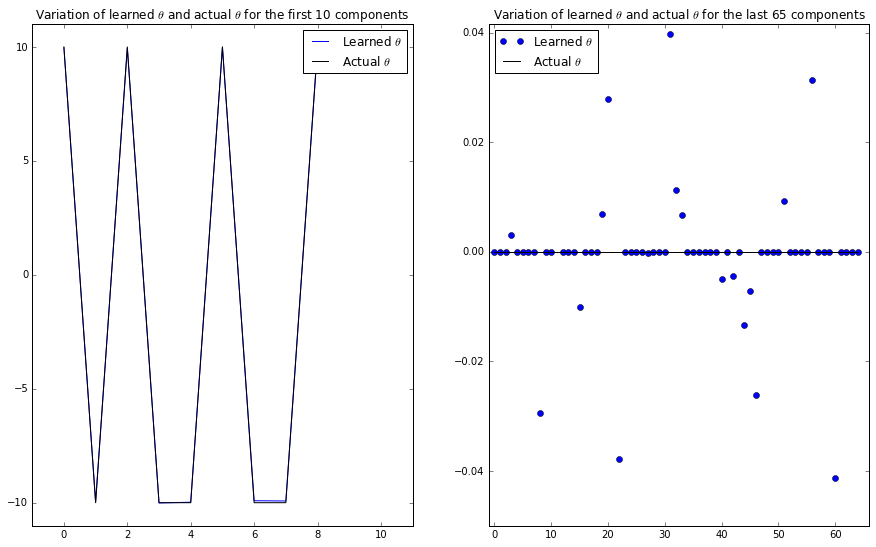

In [9]:
plt.figure(figsize=(15,9))
plt.subplot(121)
plt.plot(np.arange(0, 10), lasso_solver.coef_[:10], 'b-', label='Learned $\\theta$')
plt.plot(np.arange(0, 10), theta[:10], 'k-', label='Actual $\\theta$')
plt.ylim((1.1*np.amin(lasso_solver.coef_[:10]), 1.1*np.amax(lasso_solver.coef_[:10])))
plt.xlim((-1, 11))
plt.title('Variation of learned $\\theta$ and actual $\\theta$ for the first 10 components')
plt.legend(loc='upper right')

plt.subplot(122)
plt.plot(np.arange(0, 65), lasso_solver.coef_[10:], 'bo', label='Learned $\\theta$')
plt.plot(np.arange(0, 65), theta[10:], 'k-', label='Actual $\\theta$')
plt.ylim((-0.05, 1.05*np.amax(lasso_solver.coef_[10:])))
plt.xlim((-1, 66))
plt.title('Variation of learned $\\theta$ and actual $\\theta$ for the last 65 components')
plt.legend(loc='upper left')
plt.show()

#### Observations
+ Most of the 0 weights are learnt to be zero
+ The non-zero weights are almost perfectly learnt.